In [1]:
%matplotlib inline

In [2]:
import vugrad as vg
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim

In [3]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [4]:
def experiment(net, epochs, criterion, optimizer, trainloader, testloader):
    acc_list = []
    loss_list = []
    epoch_list = []
    for epoch in range(epochs):  # loop over the dataset multiple times
        print('...validate...')
        epoch_list.append(epoch)
        #validate model during the training epochs
        acc = validate(net, testloader)
        print(acc)
        acc_list.append(acc)

        running_loss = 0.0
        print('...training epoch = ', epoch, '...')
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            loss_list.append(running_loss)
            if i % 2000 == 1999:    # print every 2000 mini-batches
                print('[%d, %5d] loss: %.3f' %
                    (epoch + 1, i + 1, running_loss / 2000))
                running_loss = 0.0
    print('Finished Training')
    return acc_list, loss_list, epoch_list


def validate(net, testloader):
    total = 0
    correct = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            # calculate outputs by running images through the network 
            outputs = net(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total

In [5]:
net = Net()
batch_size = 100
epochs = 50
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)
                                         
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [6]:
acc_list, loss_list, epoch_list = experiment(net, epochs, criterion, optimizer, trainloader, testloader)

...validate...
0.1013
...training epoch =  0 ...
...validate...
0.1878
...training epoch =  1 ...
...validate...
0.2071
...training epoch =  2 ...
...validate...
0.3046
...training epoch =  3 ...
...validate...
0.3518
...training epoch =  4 ...
...validate...
0.3804
...training epoch =  5 ...
...validate...
0.4126
...training epoch =  6 ...
...validate...
0.4362
...training epoch =  7 ...
...validate...
0.456
...training epoch =  8 ...
...validate...
0.4714
...training epoch =  9 ...
...validate...
0.4811
...training epoch =  10 ...
...validate...
0.4971
...training epoch =  11 ...
...validate...
0.5068
...training epoch =  12 ...
...validate...
0.5059
...training epoch =  13 ...
...validate...
0.5165
...training epoch =  14 ...
...validate...
0.5303
...training epoch =  15 ...
...validate...
0.5374
...training epoch =  16 ...
...validate...
0.5354
...training epoch =  17 ...
...validate...
0.551
...training epoch =  18 ...
...validate...
0.5547
...training epoch =  19 ...
...validate.

In [7]:
print(len(loss_list))
ep_list = []
for i in range(len(loss_list)):
    ep_list.append((i*(epochs/len(loss_list))))
print(len(ep_list))

25000
25000


No handles with labels found to put in legend.


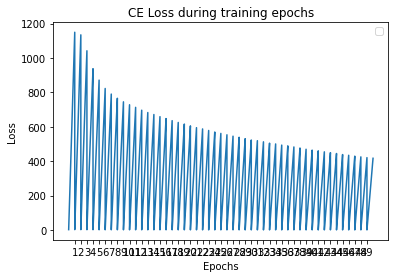

In [10]:
y1 = loss_list
x1 = ep_list
plt.plot(x1, y1)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('CE Loss during training epochs')
plt.xticks(np.arange(1, 50, 1))
plt.legend()
plt.savefig('figures/Q11-CE_LOSStorchnn')
plt.show()

No handles with labels found to put in legend.


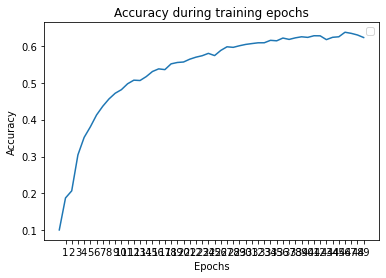

In [11]:
y1 = acc_list
x1 = epoch_list
plt.plot(x1, y1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy during training epochs')
plt.xticks(np.arange(1, 50, 1))
plt.legend()
plt.savefig('figures/Q11-ACC_torchnn')
plt.show()

In [13]:
net = Net()
batch_size = 200
epochs = 50
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)
                                         
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [14]:

acc_list2, loss_list2, epoch_list = experiment(net, epochs, criterion, optimizer, trainloader, testloader)

...validate...
0.0999
...training epoch =  0 ...
...validate...
0.0996
...training epoch =  1 ...
...validate...
0.1038
...training epoch =  2 ...
...validate...
0.1481
...training epoch =  3 ...
...validate...
0.1624
...training epoch =  4 ...
...validate...
0.2469
...training epoch =  5 ...
...validate...
0.2948
...training epoch =  6 ...
...validate...
0.3068
...training epoch =  7 ...
...validate...
0.3272
...training epoch =  8 ...
...validate...
0.3518
...training epoch =  9 ...
...validate...
0.3733
...training epoch =  10 ...
...validate...
0.3841
...training epoch =  11 ...
...validate...
0.3951
...training epoch =  12 ...
...validate...
0.4055
...training epoch =  13 ...
...validate...
0.422
...training epoch =  14 ...
...validate...
0.4292
...training epoch =  15 ...
...validate...
0.4312
...training epoch =  16 ...
...validate...
0.4522
...training epoch =  17 ...
...validate...
0.4633
...training epoch =  18 ...
...validate...
0.4647
...training epoch =  19 ...
...validate

In [15]:
net = Net()
batch_size = 300
epochs = 50
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)
                                         
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [16]:
acc_list3, loss_list3, epoch_list = experiment(net, epochs, criterion, optimizer, trainloader, testloader)

...validate...
0.1001
...training epoch =  0 ...
...validate...
0.1
...training epoch =  1 ...
...validate...
0.1001
...training epoch =  2 ...
...validate...
0.1347
...training epoch =  3 ...
...validate...
0.1886
...training epoch =  4 ...
...validate...
0.2099
...training epoch =  5 ...
...validate...
0.2465
...training epoch =  6 ...
...validate...
0.2657
...training epoch =  7 ...
...validate...
0.2715
...training epoch =  8 ...
...validate...
0.2966
...training epoch =  9 ...
...validate...
0.3029
...training epoch =  10 ...
...validate...
0.3186
...training epoch =  11 ...
...validate...
0.3258
...training epoch =  12 ...
...validate...
0.3365
...training epoch =  13 ...
...validate...
0.3623
...training epoch =  14 ...
...validate...
0.3772
...training epoch =  15 ...
...validate...
0.3855
...training epoch =  16 ...
...validate...
0.4016
...training epoch =  17 ...
...validate...
0.4116
...training epoch =  18 ...
...validate...
0.4175
...training epoch =  19 ...
...validate..

In [20]:
net = Net()
batch_size = 50
epochs = 50
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)
                                         
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [21]:

acc_list4, loss_list4, epoch_list = experiment(net, epochs, criterion, optimizer, trainloader, testloader)

...validate...
0.0999
...training epoch =  0 ...
...validate...
0.1308
...training epoch =  1 ...
...validate...
0.2805
...training epoch =  2 ...
...validate...
0.3804
...training epoch =  3 ...
...validate...
0.4263
...training epoch =  4 ...
...validate...
0.4569
...training epoch =  5 ...
...validate...
0.4837
...training epoch =  6 ...
...validate...
0.5107
...training epoch =  7 ...
...validate...
0.5309
...training epoch =  8 ...
...validate...
0.5416
...training epoch =  9 ...
...validate...
0.5472
...training epoch =  10 ...
...validate...
0.5696
...training epoch =  11 ...
...validate...
0.586
...training epoch =  12 ...
...validate...
0.5905
...training epoch =  13 ...
...validate...
0.5966
...training epoch =  14 ...
...validate...
0.6052
...training epoch =  15 ...
...validate...
0.6138
...training epoch =  16 ...
...validate...
0.6026
...training epoch =  17 ...
...validate...
0.6204
...training epoch =  18 ...
...validate...
0.6275
...training epoch =  19 ...
...validate

In [22]:
net = Net()
batch_size = 25
epochs = 50
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)
                                         
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [23]:
acc_list5, loss_list5, epoch_list = experiment(net, epochs, criterion, optimizer, trainloader, testloader)

...validate...
0.0993
...training epoch =  0 ...
[1,  2000] loss: 2.160
...validate...
0.3185
...training epoch =  1 ...
[2,  2000] loss: 1.702
...validate...
0.4048
...training epoch =  2 ...
[3,  2000] loss: 1.483
...validate...
0.4864
...training epoch =  3 ...
[4,  2000] loss: 1.371
...validate...
0.5041
...training epoch =  4 ...
[5,  2000] loss: 1.290
...validate...
0.5427
...training epoch =  5 ...
[6,  2000] loss: 1.223
...validate...
0.5497
...training epoch =  6 ...
[7,  2000] loss: 1.169
...validate...
0.591
...training epoch =  7 ...
[8,  2000] loss: 1.118
...validate...
0.6043
...training epoch =  8 ...
[9,  2000] loss: 1.074
...validate...
0.6069
...training epoch =  9 ...
[10,  2000] loss: 1.038
...validate...
0.618
...training epoch =  10 ...
[11,  2000] loss: 0.999
...validate...
0.6329
...training epoch =  11 ...
[12,  2000] loss: 0.968
...validate...
0.6347
...training epoch =  12 ...
[13,  2000] loss: 0.939
...validate...
0.6385
...training epoch =  13 ...
[14,  200

In [24]:
print(len(loss_list))
ep_list = []
for i in range(len(loss_list)):
    ep_list.append((i*(epochs/len(loss_list))))
print(len(ep_list))

25000
25000


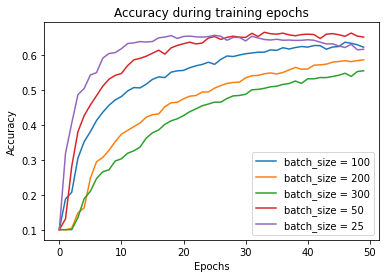

In [25]:
y1 = acc_list
x1 = epoch_list
plt.plot(x1, y1, label = "batch_size = 100" )
y2 = acc_list2
x2 = epoch_list
plt.plot(x2, y2, label = "batch_size = 200" )
y3 = acc_list3
x3 = epoch_list
plt.plot(x3, y3, label = "batch_size = 300" )
y4 = acc_list4
x4 = epoch_list
plt.plot(x4, y4, label = "batch_size = 50" )
y5 = acc_list5
x5= epoch_list
plt.plot(x5, y5, label = "batch_size = 25" )
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy during training epochs')
plt.xticks(np.arange(0, 51, 10))
plt.legend()
plt.savefig('figures/Q11-5batches')
plt.show()

In [7]:

ep_list2 = []
for i in range(len(loss_list2)):
    ep_list2.append((i*(epochs/len(loss_list2))))

ep_list3 = []
for i in range(len(loss_list3)):
    ep_list3.append((i*(epochs/len(loss_list3))))

ep_list4 = []
for i in range(len(loss_list4)):
    ep_list4.append((i*(epochs/len(loss_list4))))

ep_list5 = []
for i in range(len(loss_list5)):
    ep_list5.append((i*(epochs/len(loss_list5))))


NameError: name 'loss_list2' is not defined

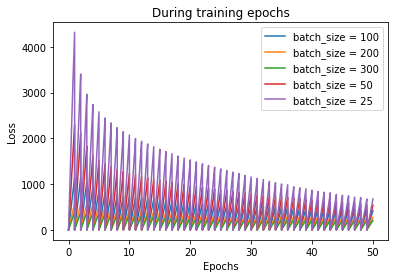

In [36]:
y1 = loss_list
x1 = ep_list
plt.plot(x1, y1, label = "batch_size = 100" )
y2 = loss_list2
x2 = ep_list2
plt.plot(x2, y2, label = "batch_size = 200" )
y3 = loss_list3
x3 = ep_list3
plt.plot(x3, y3, label = "batch_size = 300" )
y4 = loss_list4
x4 = ep_list4
plt.plot(x4, y4, label = "batch_size = 50" )
y5 = loss_list5
x5= ep_list5
plt.plot(x5, y5, label = "batch_size = 25" )
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('During training epochs')
plt.xticks(np.arange(0, 51, 10))
plt.legend()
plt.savefig('figures/Q11-loss_5batches')
plt.show()

In [1]:
def max_acc(acc_list):
    max_value = max(acc_list)
    max_index = acc_list.index(max_value)
    return max_value, max_index
    

In [6]:
acc1, acc_index1 = max_acc(acc_list)
acc2, acc_index2 = max_acc(acc_list2)
acc3, acc_index3 = max_acc(acc_list3)
acc4, acc_index4 = max_acc(acc_list4)
acc5, acc_index5 = max_acc(acc_list5)
print("b=100",acc1, acc_index1)
print("b=200",acc2, acc_index2)
print("b=300",acc3, acc_index3)
print("b=50",acc4, acc_index4)
print("b=25",acc5, acc_index5)

NameError: name 'acc_list4' is not defined